     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 6.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2024.12.1 requires urllib3>=1.26.5, but you have urllib3 1.24.3 which is incompatible.
sentry-sdk 2.32.0 requires urllib3>=1.26.11, but you have urllib3 1.24.3 which is incompatible.
torchdata 0.11.0 requires urllib3>=1.25, but you have urllib3 1.24.3 which is incompatible.
blobfile 3.0.0 requires urllib3<3,>=1.25.3, but you have urllib3 1.24.3 which is incompatible.


/tmp/ipython-input-1-3612265843.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1-3612265843.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download(benchmark, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


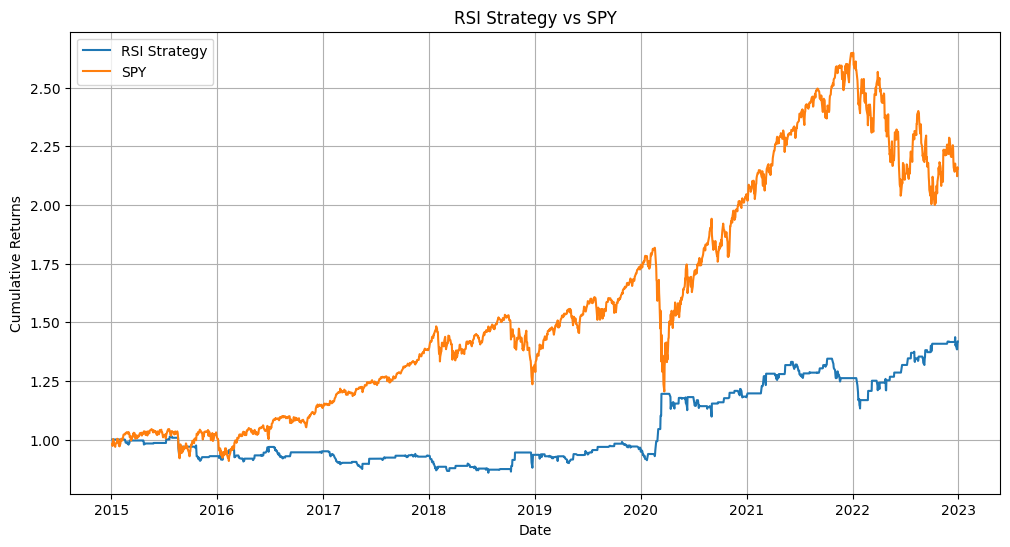

In [1]:
# 1. Setting up the environment
!pip install yfinance pandas numpy matplotlib alpaca-trade-api --quiet

# 2. Importing the libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import time

# 3. Fetching historical data
symbol = 'QQQ'
benchmark = 'SPY'
start_date = '2015-01-01'
end_date = '2022-12-31'

data = yf.download(symbol, start=start_date, end=end_date)
spy_data = yf.download(benchmark, start=start_date, end=end_date)

# 4. Calculating the RSI
def rsi(close, period=14):
    delta = close.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

data['RSI'] = rsi(data['Close'], 14)

# 5. Implementing the trading strategy
data['Signal'] = 0
data.loc[data['RSI'] < 30, 'Signal'] = 1  # Buy
data.loc[data['RSI'] > 70, 'Signal'] = -1  # Sell

# 6. Backtesting the strategy
data['Daily_Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1)
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

# Benchmark return
spy_data['Daily_Return'] = spy_data['Close'].pct_change()
spy_data['Cumulative_Return'] = (1 + spy_data['Daily_Return']).cumprod()

# 7. Plotting the results
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Cumulative_Return'], label='RSI Strategy')
plt.plot(spy_data.index, spy_data['Cumulative_Return'], label='SPY')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('RSI Strategy vs SPY')
plt.legend()
plt.grid(True)
plt.show()